# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


Background
- GoalZone is a fitness club chain in Canada.
- GoalZone offers a range of fitness classes in two capacities - 25 and 15.
- Some classes are always fully booked. Fully booked classes often have a low attendance rate.
- GoalZone wants to increase the number of spaces available for classes.
- They want to do this by predicting whether the member will attend the class or not.
- If they can predict a member will not attend the class, they can make another space
- available.


|Column Name | Criteria|
|------------|--------|
|booking_id  | Nominal. The unique identifier of the booking. Missing values are not possible due to the database structure.|
|months_as_member | Discrete. The number of months as this fitness club member,minimum 1 month.Replace missing values with the overall average month.|
|weight | Continuous. The member's weight in kg, rounded to 2 decimal places. The minimum possible value is 40.00 kg.Replace missing values with the overall average weight.|
|days_before | Discrete. The number of days before the class the member registered, minimum 1 day. Replace missing values with 0.|
|day_of_week | Ordinal. The day of the week of the class. One of “Mon”, “Tue”, “Wed”,“Thu”, “Fri”, “Sat” or “Sun”. Replace missing values with “unknown”.|
|time | Ordinal. The time of day of the class. Either “AM” or “PM”. Replace missing values with “unknown”.|
|category| Nominal. The category of the fitness class. One of “Yoga”, “Aqua”,“Strength”, “HIIT”, or “Cycling”.Replace missing values with “unknown”.|
|attended | Nominal. Whether the member attended the class (1) or not (0).Missing values should be removed|

# Task 1 

## `Answer`

**1. For every column in the data:**

**a. State whether the values match the description given in the table above.**

- `Not all columns follow the description in the table.`
- `days_before` has object datatype due to trailing ' days' for some values.
- `day_of_week` has inconsistent naming ('Wednesday' vs 'Wed', 'Monday' vs 'Mon', 'Fri.' vs 'Fri')
    - `category` has unexpected "-" character as value. 
    - `weight` has NA values but other values look accurate. 
 
**b. State the number of missing values in the column.**
	
- `weight` column has 20 missing values in column 
- `category` column has 13 "-" values. This could be missing or incorrect entry. 
    
**c.Describe what you did to make values match the description if they did not match.**
	
- `days_before` removed trailing ' days' str and converted column to integer type.
- `day_of_week` converted 'Wednesday' to 'Wed', 'Monday' to 'Mon', 'Fri.' to 'Fri'
- `category` converted "-" values to 'unknown' 
- `weight` replaced the missing values with the overall average weight. 
	

**### Setting style**

In [149]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th{
    border:1px black solid !important;
    color: black !important;
}
</style>

*****Load** modules, data and looking at the first few observations***

In [150]:
# Load modules 

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline

master_df = pd.read_csv("fitness_class_2212.csv")

df = master_df.copy()
df.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


***Checking at descriptive stats for numeric columns***

In [151]:
df.describe()

,booking_id,months_as_member,weight,attended
count,1500.000000,1500.000000,1480.000000,1500.000000
mean,750.500000,15.628667,82.610378,0.302667
std,433.157015,12.926543,12.765859,0.459565
min,1.000000,1.000000,55.410000,0.000000
25%,375.750000,8.000000,73.490000,0.000000
50%,750.500000,12.000000,80.760000,0.000000
75%,1125.250000,19.000000,89.520000,1.000000
max,1500.000000,148.000000,170.520000,1.000000


In [152]:
df.attended.value_counts(normalize=True)

0    0.697333
1    0.302667
Name: attended, dtype: float64

***Looking at non-null values and columns' data types***

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


**Checking at null values**

In [154]:
print("Missing values")
print("-"*23)
print(df.isnull().sum())
print("-"*23)
print(f"Total missing values:{df.isnull().sum().sum()}")

Missing values
-----------------------
booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64
-----------------------
Total missing values:20


**Looking at value counts for categorical columns**

In [155]:
for col in ['days_before', 'day_of_week', 'time', 'category']:
    print(col, "\n", df[col].value_counts())
    print("-"*30)

days_before 
 10         293
2          199
8          194
12         178
14         172
4          154
6           70
7           38
3           31
5           30
11          26
13          25
15          24
9           24
1            9
10 days      6
14 days      3
12 days      3
6 days       3
4 days       3
16           3
17           3
20           1
2 days       1
5 days       1
7 days       1
8 days       1
1 days       1
3 days       1
13 days      1
29           1
Name: days_before, dtype: int64
------------------------------
day_of_week 
 Fri          279
Thu          241
Mon          218
Sun          213
Sat          202
Tue          195
Wed           81
Wednesday     35
Fri.          26
Monday        10
Name: day_of_week, dtype: int64
------------------------------
time 
 AM    1141
PM     359
Name: time, dtype: int64
------------------------------
category 
 HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
-            13
Name: category, dty

**Editing `day_of_week` column for consistency**

In [156]:
df.day_of_week = df.day_of_week.str.replace("Monday","Mon").replace("Wednesday","Wed").replace("Fri.","Fri")

df.day_of_week.value_counts()

Fri    305
Thu    241
Mon    228
Sun    213
Sat    202
Tue    195
Wed    116
Name: day_of_week, dtype: int64

**Editing `category` column to replace "-" values with 'unknown'** 

In [157]:
df.category = df.category.str.replace("-", "unknown")
df.category.value_counts()

HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
unknown      13
Name: category, dtype: int64

**Editing `days_before` column to replace " days" values with "" and convert datatype to integer** 

In [158]:
df['days_before'] = df['days_before'].str.replace(" days","").astype(int)
df['days_before'].value_counts()

10    299
2     200
8     195
12    181
14    175
4     157
6      73
7      39
3      32
5      31
13     26
11     26
9      24
15     24
1      10
16      3
17      3
20      1
29      1
Name: days_before, dtype: int64

**`weight` column: Replacing missing values with the overall average weight.**

In [159]:
df.weight = df.weight.fillna(df.weight.mean())
df.weight.isna().sum()

0

**Rechecking dataframe descriptive stats**

In [160]:
df.describe()

,booking_id,months_as_member,weight,days_before,attended
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,750.500000,15.628667,82.610378,8.346667,0.302667
std,433.157015,12.926543,12.680411,4.077938,0.459565
min,1.000000,1.000000,55.410000,1.000000,0.000000
25%,375.750000,8.000000,73.562500,4.000000,0.000000
50%,750.500000,12.000000,81.035000,9.000000,0.000000
75%,1125.250000,19.000000,89.382500,12.000000,1.000000
max,1500.000000,148.000000,170.520000,29.000000,1.000000


**Rechecking dataframe for null values**

In [161]:
df.isnull().sum()

booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64

_**Converting categorical values into 0's and 1's**_

In [162]:
# Convert categorical columns 
from sklearn.preprocessing import LabelEncoder

# Define the columns to be one-hot encoded
cols_to_encode = ['day_of_week', 'time', 'category']

# Create an instance of the OneHotEncoder class
encoder = LabelEncoder()

# Fit the encoder to the relevant columns and transform the data
df[cols_to_encode] = df[cols_to_encode].apply(encoder.fit_transform)

# check the result
df.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,6,1,3,0
1,2,10,79.01,2,1,0,2,0
2,3,16,74.53,14,3,0,3,0
3,4,5,86.12,10,0,0,1,0
4,5,15,69.29,8,4,0,2,0


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1500 non-null   float64
 3   days_before       1500 non-null   int64  
 4   day_of_week       1500 non-null   int64  
 5   time              1500 non-null   int64  
 6   category          1500 non-null   int64  
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 93.9 KB


_**Converting day_of_week and category columns with onehot encoding'**_

In [164]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['day_of_week', 'category'])

one_hot_encoded_data.head()

,booking_id,months_as_member,weight,days_before,time,attended,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,category_0,category_1,category_2,category_3,category_4,category_5
0,1,17,79.56,8,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,2,10,79.01,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,3,16,74.53,14,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,4,5,86.12,10,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,5,15,69.29,8,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [165]:
# copy encoded data

df = one_hot_encoded_data.copy()
df.head()

,booking_id,months_as_member,weight,days_before,time,attended,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,category_0,category_1,category_2,category_3,category_4,category_5
0,1,17,79.56,8,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,2,10,79.01,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,3,16,74.53,14,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,4,5,86.12,10,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,5,15,69.29,8,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


**_Rechecking dataframe information_** 

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1500 non-null   float64
 3   days_before       1500 non-null   int64  
 4   time              1500 non-null   int64  
 5   attended          1500 non-null   int64  
 6   day_of_week_0     1500 non-null   uint8  
 7   day_of_week_1     1500 non-null   uint8  
 8   day_of_week_2     1500 non-null   uint8  
 9   day_of_week_3     1500 non-null   uint8  
 10  day_of_week_4     1500 non-null   uint8  
 11  day_of_week_5     1500 non-null   uint8  
 12  day_of_week_6     1500 non-null   uint8  
 13  category_0        1500 non-null   uint8  
 14  category_1        1500 non-null   uint8  
 15  category_2        1500 non-null   uint8  
 16  category_3        1500 non-null   uint8  



==============================================================================================




# Task 2

## Answers

**2. Create a visualization that shows how many bookings attended the class. Use the visualization to:**
	
**a. State which category of the variable attended has the most observations**

- `As we can see from the barchart, class 0/No from `attended` columns has the most observation (1046) vs class 1/Yes (454). The distirbutions is imbalanced since there are more observations in the did not attend (0) category.`
	
**b. Explain whether the observations are balanced across categories of the variable `attended`**

- `The observations are not balanced across categories of the variable `attended`. There are more bookings that did not attend the class (0/No) than those did attend class (1/Yes).`

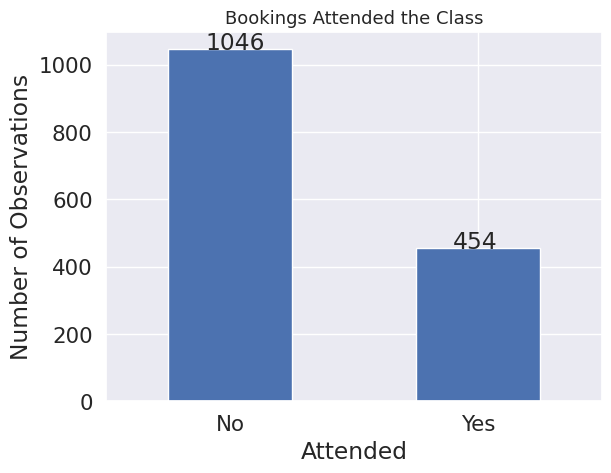

In [167]:
import matplotlib.pyplot as plt
import pandas as pd

# Use the value_counts() method to count the number of observations in each category of the 'attended' variable
attended_counts = df['attended'].apply(lambda x: "Yes" if x==1 else "No").value_counts()

# Create a bar chart
attended_counts.plot(kind='bar')

# Add labels to the axes
plt.xlabel('Attended')
plt.ylabel('Number of Observations')
plt.title("Bookings Attended the Class", size=13)

# rotate x-axis
plt.xticks(rotation=0)

# Display values
# Iterate through the bars to add the values
for i, v in enumerate(attended_counts.values):
    plt.text(i - 0.10, v + 0.5, str(v))

# Show the chart
plt.show()


==============================================================================================




# Task 3
3. Describe the distribution of the number of months as a member. Your answer must include a visualization that shows the distribution.

## Answer

- `As the histogram below shows, the overall distribution is right-skewed. The average membership month is around 15.5. With median of 10, half the membership is below 10months and the other half is above 10months. 8 months is the most common value in the dataset when it comes to the number of months of membership.`
- `As the histogram and boxplots show, there are significant outliers in the dataset`
- `Note: when `attendance` column is taken into account, those that didn't attend class (0), have lower mean, meadian and mode values than members that attend class.`

**_Visualizing the overall distribution for `months_as_member` column_**

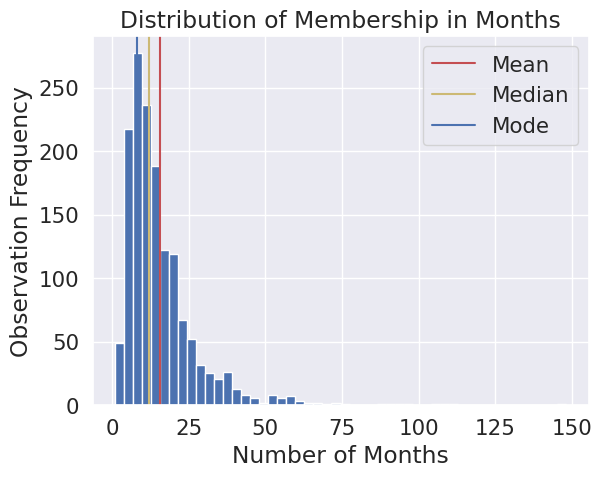

In [168]:
# Plot histogram distribution for df.months_as_member

# Add mean and median lines
plt.axvline(df.months_as_member.mean(), color='r', label='Mean')
plt.axvline(df.months_as_member.median(), color='y', label='Median')
plt.axvline(df.months_as_member.mode()[0], color='b', label='Mode')

# Plot the data
plt.hist(df.months_as_member, bins=50)
plt.title("Distribution of Membership in Months")
plt.xlabel("Number of Months")
plt.ylabel("Observation Frequency")
plt.legend()
plt.show()

_**Distribution of `months_as_member` per attendance**_

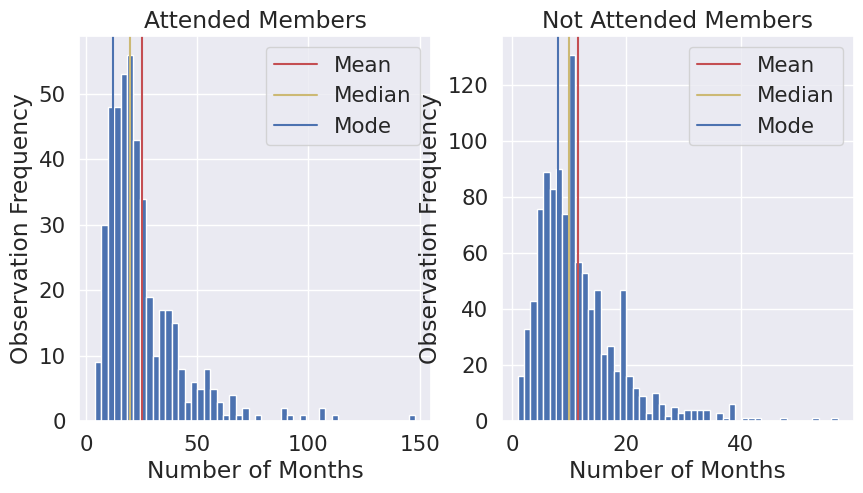

In [169]:
import matplotlib.pyplot as plt

# Create a new dataframe with only the rows where attended is 1
attended_df = df[df['attended'] == 1]

# Create a new dataframe with only the rows where attended is 0
not_attended_df = df[df['attended'] == 0]

# Create the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Create the first plot
ax1.hist(attended_df.months_as_member, bins=50)
ax1.set_title("Attended Members")
ax1.set_xlabel("Number of Months")
ax1.set_ylabel("Observation Frequency")

# Add mean and median lines
ax1.axvline(attended_df.months_as_member.mean(), color='r', label='Mean')
ax1.axvline(attended_df.months_as_member.median(), color='y', label='Median')
ax1.axvline(attended_df.months_as_member.mode()[0], color='b', label='Mode')
ax1.legend()

# Create the second plot
ax2.hist(not_attended_df.months_as_member, bins=50)
ax2.set_title("Not Attended Members")
ax2.set_xlabel("Number of Months")
ax2.set_ylabel("Observation Frequency")

# Add mean and median lines
ax2.axvline(not_attended_df.months_as_member.mean(), color='r', label='Mean')
ax2.axvline(not_attended_df.months_as_member.median(), color='y', label='Median')
ax2.axvline(not_attended_df.months_as_member.mode()[0], color='b', label='Mode')
ax2.legend()

# show plot
plt.show()


_**Boxplot distribution for `months_as_member` per class attendance**_

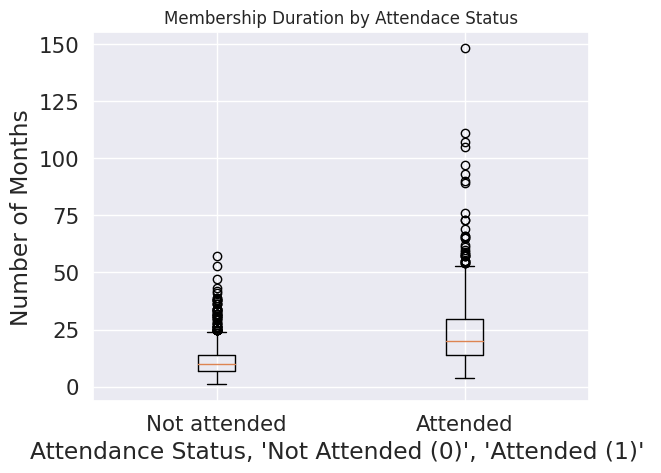

In [170]:
import matplotlib.pyplot as plt

# create a boxplot
plt.boxplot([df[df['attended'] == 0].months_as_member, df[df['attended'] == 1].months_as_member], 
            vert=True, labels=['Not attended', 'Attended'])

# add labels 
plt.xlabel("Attendance Status, 'Not Attended (0)', 'Attended (1)' ")
plt.ylabel("Number of Months")
plt.title("Membership Duration by Attendace Status", size=12)
plt.suptitle("")
plt.show()


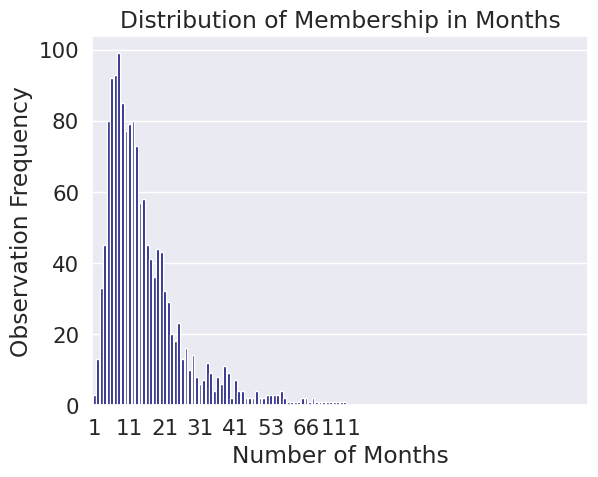

In [171]:
import seaborn as sns

sns.countplot(x="months_as_member", data=df, color='darkblue')
plt.title("Distribution of Membership in Months")
plt.xlabel("Number of Months")
plt.ylabel("Observation Frequency")

plt.xticks(range(0, df.months_as_member.max(), 10))
plt.show()


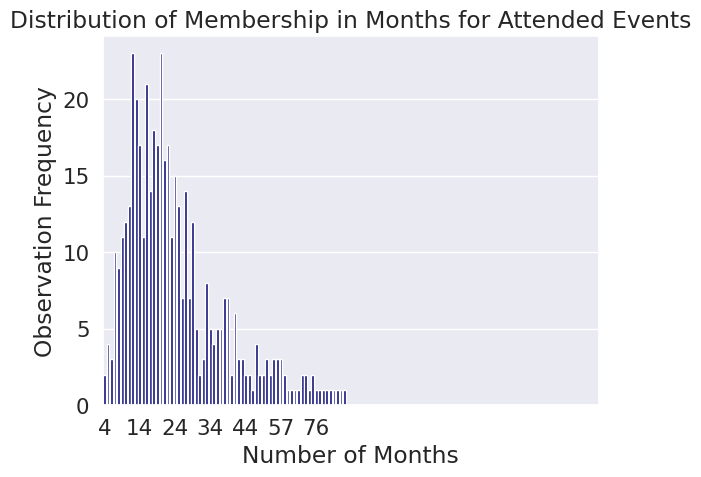

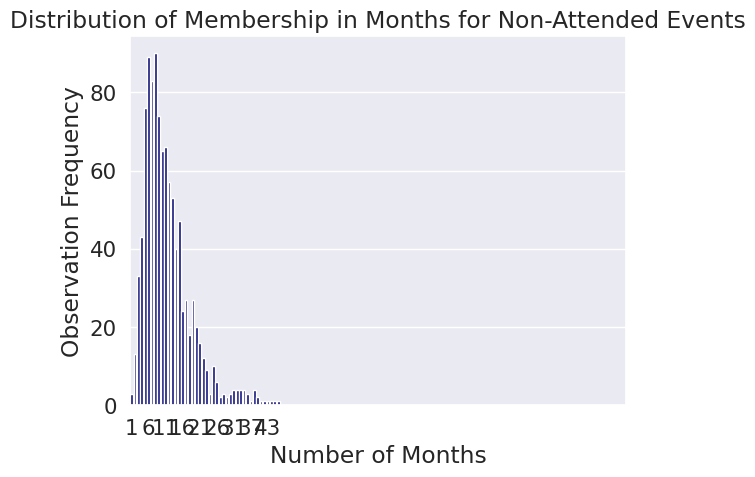

In [172]:
sns.countplot(x="months_as_member", data=df[df['attended']==1], color='darkblue')
plt.title("Distribution of Membership in Months for Attended Events")
plt.xlabel("Number of Months")
plt.ylabel("Observation Frequency")
# plt.xticks(rotation=90)
plt.xticks(range(0, df.months_as_member.max(), 10))
plt.show()

sns.countplot(x="months_as_member", data=df[df['attended']==0], color='darkblue')
plt.title("Distribution of Membership in Months for Non-Attended Events")
plt.xlabel("Number of Months")
plt.ylabel("Observation Frequency")

plt.xticks(range(0, df.months_as_member.max(), 5))
# plt.xticks(rotation=90)
plt.show()

# Task 4

## Answer
**4. Describe the relationship between attendance and number of months as a member. Your answer must include a visualization to demonstrate the relationship.**

- `The heatmap below shows correlation between features. Columns attended and months_as_member have a moderate positve correlation (0.49). This means that as the value months as member increases, the members likelihood of attending class is higher. Those with lower months of membership are likely not to attend classes. This doesn't prove causation.` 
- `Per histogram below, both classes have right skewed distribution. It is worth noting those that didn't attend class (0), have lower mean, meadian and mode values than members who attended class (1). Also, there are a significant number of outliers for both.` 
- `The boxplot also shows lower quartiles and median for those that didn't attend class(0). There are still lots of outliers for both classes. `


***Checking correlation***

In [173]:
df.attended.corr(df.months_as_member)

0.4855262232752628

_**Creating correlation plot for the dataframe**_

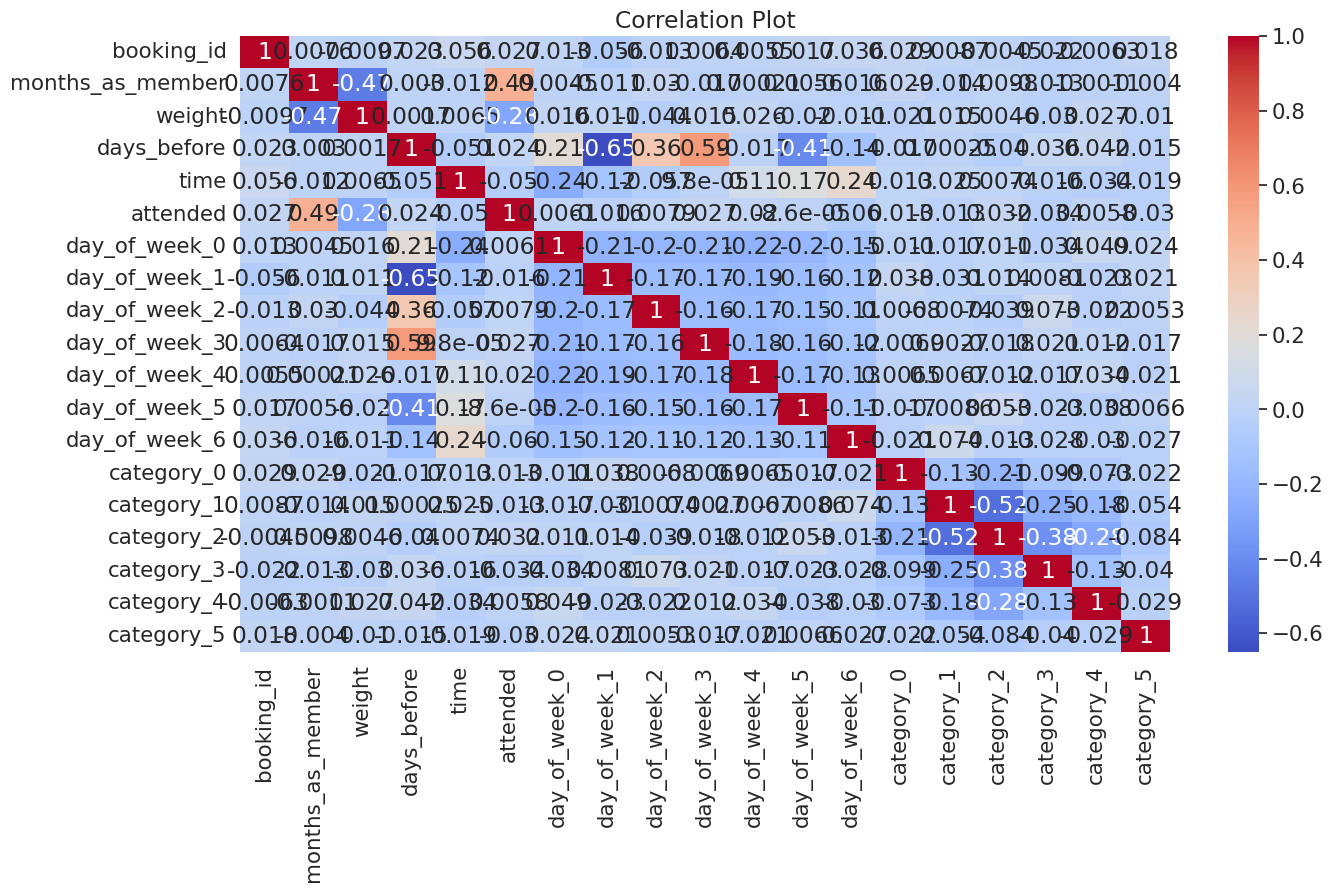

In [174]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Plot")
plt.show()

_**Visualizing distribution of months_as_member per class attended**_

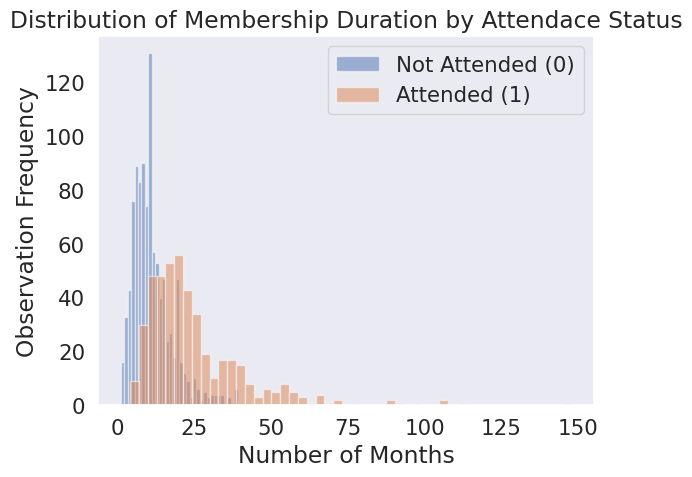

In [175]:
df.groupby('attended').months_as_member.hist(alpha=0.5, bins=50)
plt.xlabel("Number of Months")
plt.ylabel("Observation Frequency")
plt.title("Distribution of Membership Duration by Attendace Status")
plt.grid(visible=False)
plt.legend(['Not Attended (0)', 'Attended (1)'])
plt.show()

_**Visualizing boxplot distribution of attendance classes 0 and 1**_

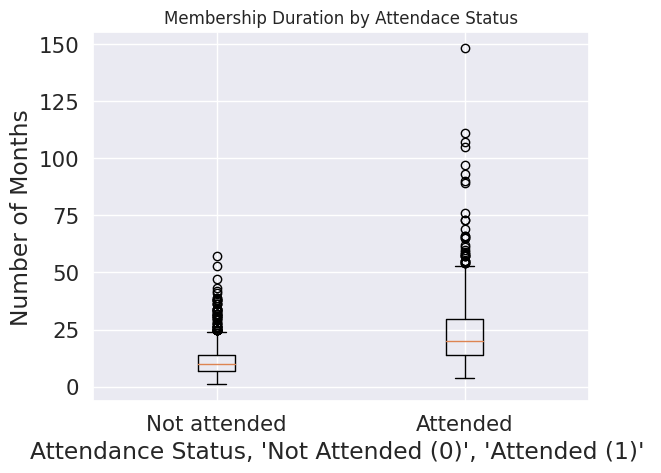

In [176]:
# create a boxplot
plt.boxplot([df[df['attended'] == 0].months_as_member, df[df['attended'] == 1].months_as_member], 
            vert=True, labels=['Not attended', 'Attended'])

# add labels 
plt.xlabel("Attendance Status, 'Not Attended (0)', 'Attended (1)' ")
plt.ylabel("Number of Months")
plt.title("Membership Duration by Attendace Status", size=12)
plt.suptitle("")
plt.show()

Column Weight Normalize and Plot it


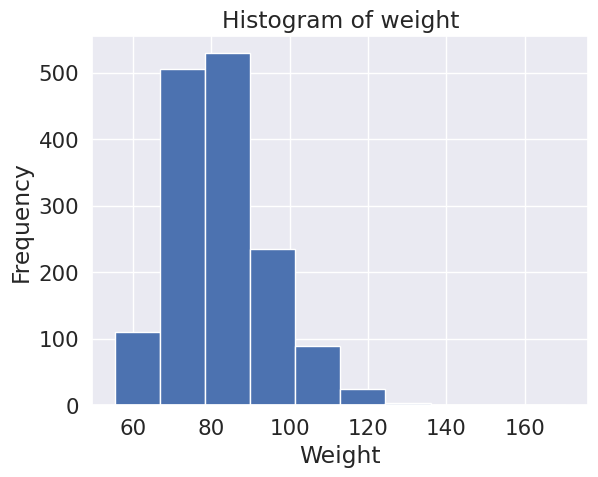

In [177]:
import matplotlib.pyplot as plt

# Create histogram for the weight column
plt.hist(df['weight'], bins=10)

# Add labels
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Histogram of weight')

# Show the plot
plt.show()

_**Scaling `weight` column and creating `Scaled_weight` column**_

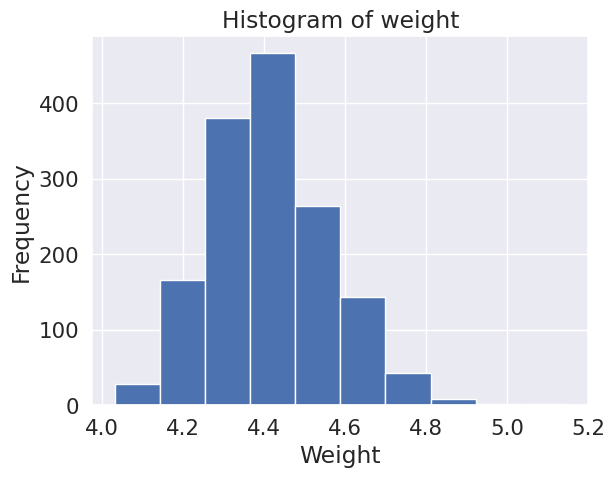

In [178]:
import matplotlib.pyplot as plt
import numpy as np

# Fit-Transform the weight column
df["Scaled_weight"] = np.log(df["weight"] + 1)

# Create histogram for the weight column
plt.hist(df['Scaled_weight'], bins=10)

# Add labels
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Histogram of weight')

# Show the plot
plt.show()

**_Scaling_ df.months_as_member**

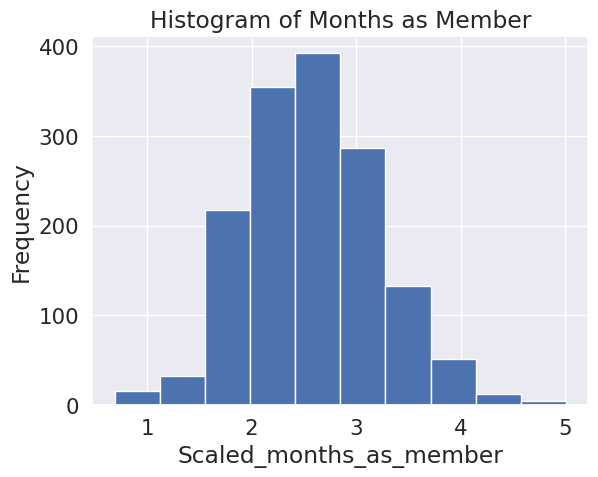

In [179]:
import matplotlib.pyplot as plt
import numpy as np

# Fit-Transform the weight column
df["Scaled_months_as_member"] = np.log(df["months_as_member"] + 1)

# Create histogram for the weight column
plt.hist(df['Scaled_months_as_member'], bins=10)

# Add labels
plt.xlabel('Scaled_months_as_member')
plt.ylabel('Frequency')
plt.title('Histogram of Months as Member')

# Show the plot
plt.show()

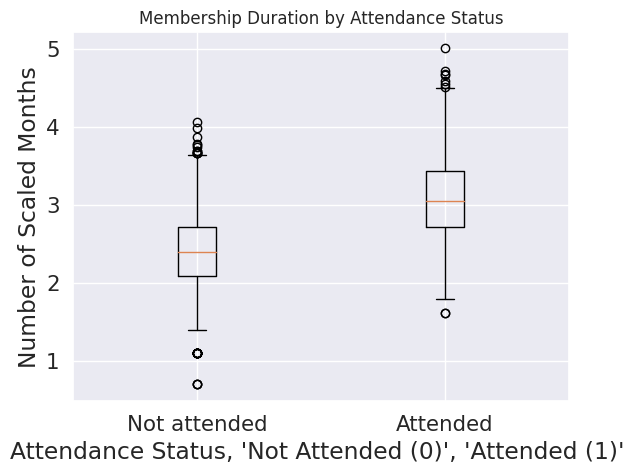

In [180]:
# create a boxplot
plt.boxplot([df[df['attended'] == 0].Scaled_months_as_member, df[df['attended'] == 1].Scaled_months_as_member], 
            vert=True, labels=['Not attended', 'Attended'])

# add labels 
plt.xlabel("Attendance Status, 'Not Attended (0)', 'Attended (1)' ")
plt.ylabel("Number of Scaled Months")
plt.title("Membership Duration by Attendance Status", size=12)
plt.suptitle("")
plt.show()

_**Before and After Normalizing 'days_before_column'**_

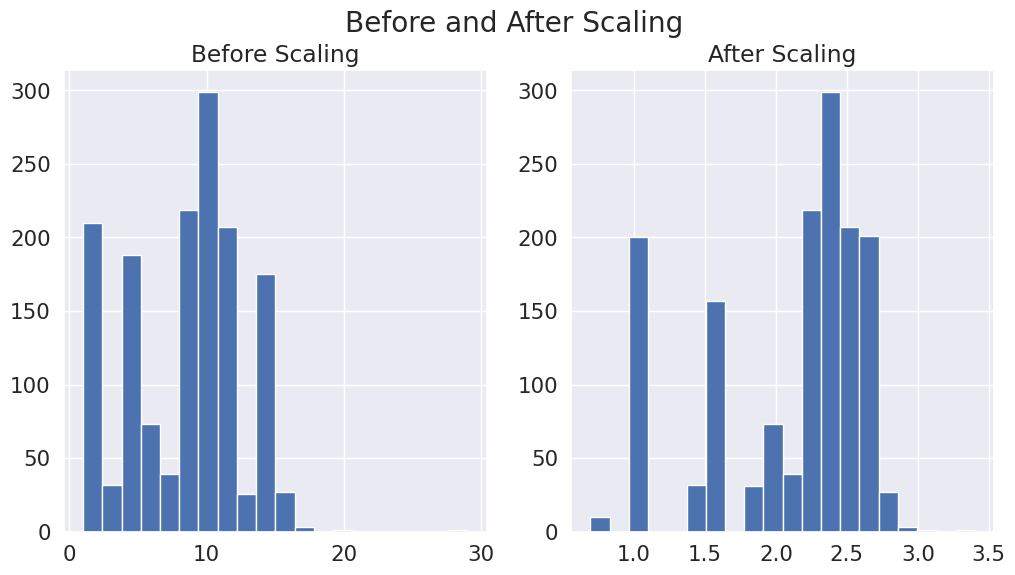

In [181]:
import matplotlib.pyplot as plt
import numpy as np 

df["SC_Scaled_days_before"] = scaler.fit_transform(df[["days_before"]])
df["Log_Scaled_days_before"] = np.log(df["days_before"] + 1)

# Create the histogram subplot
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].hist(df["days_before"], bins=20)
ax[0].set_title("Before Scaling")
ax[1].hist(df["Log_Scaled_days_before"], bins=20)
ax[1].set_title("After Scaling")

plt.suptitle("Before and After Scaling")
plt.show()


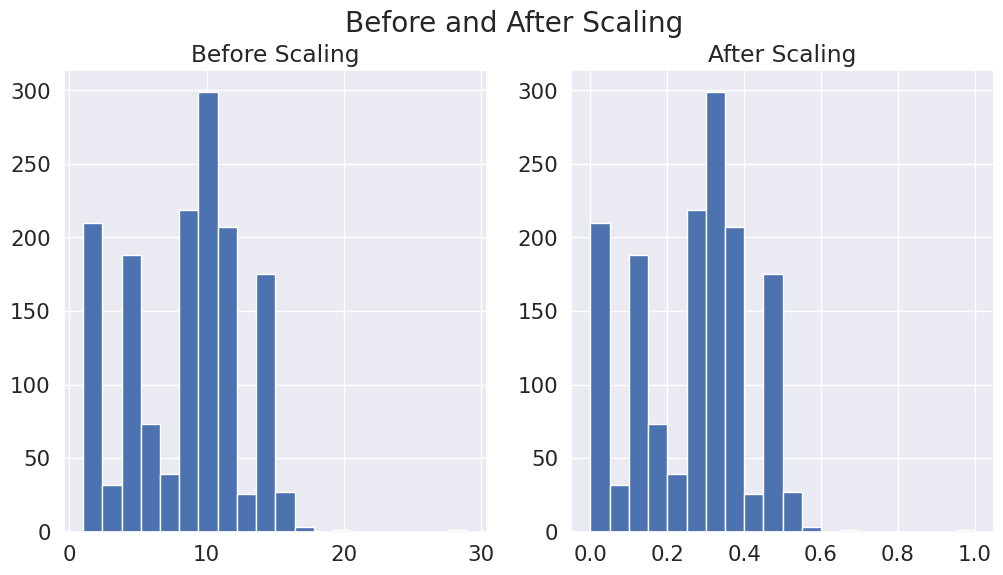

In [182]:
import matplotlib.pyplot as plt
import numpy as np 

df["SC_Scaled_days_before"] = scaler.fit_transform(df[["days_before"]])

# Create the histogram subplot
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].hist(df["days_before"], bins=20)
ax[0].set_title("Before Scaling")
ax[1].hist(df["SC_Scaled_days_before"], bins=20)
ax[1].set_title("After Scaling")

plt.suptitle("Before and After Scaling")
plt.show()


=================================================================================================================================




# Task 5
**5. The business wants to predict whether members will attend using the data provided. State the type of machine learning problem that this is (regression/ classification/clustering).**

## Answer
- `This is a binary classification problem since the goal is to predict whether a person will attend class or not-attend. We can use Logistic Regression as a base classification model and compare it against XGBoost Classifier.`

# Task 6
**6. Fit a baseline model to predict whether members will attend using the data provided. You must include your code.**

## Answer - see below



**_Checking variance in the data_**

In [183]:
df.drop('booking_id', axis=1).var().sort_values(ascending=False)

months_as_member           167.095509
weight                     160.792813
days_before                 16.629575
Scaled_months_as_member      0.398695
Log_Scaled_days_before       0.293870
category_2                   0.247103
attended                     0.211200
category_1                   0.187958
time                         0.182174
day_of_week_0                0.162097
day_of_week_4                0.134943
category_3                   0.131292
day_of_week_1                0.128982
day_of_week_3                0.121917
day_of_week_2                0.116609
day_of_week_5                0.113175
category_4                   0.081955
day_of_week_6                0.071400
category_0                   0.048132
SC_Scaled_days_before        0.021211
Scaled_weight                0.021180
category_5                   0.008597
dtype: float64

In [184]:
df.attended.value_counts(normalize=True)
df.attended.value_counts(normalize=False)

0    1046
1     454
Name: attended, dtype: int64

_**Feature Extraction**_

In [185]:
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.linear_model import LogisticRegression

# Define X and y
X = df.drop(["attended", "booking_id"], axis=1)
y = df['attended']

# Create a logistic regression model
logreg = LogisticRegression()

# Use RFE to select the top n features
rfe = RFE(logreg, n_features_to_select=10)
X_rfe = rfe.fit_transform(X, y)
print("Selected features using RFE:", X.columns[rfe.support_])
print("")

# Use SelectFromModel to select the features with the highest coefficients
select_from_model = SelectFromModel(logreg, threshold='median')
X_sfm = select_from_model.fit_transform(X, y)
print("Selected features using SelectFromModel:", X.columns[select_from_model.get_support()])


Selected features using RFE: Index(['time', 'day_of_week_1', 'day_of_week_3', 'day_of_week_5',
       'day_of_week_6', 'category_0', 'category_2', 'category_5',
       'Scaled_months_as_member', 'Log_Scaled_days_before'],
      dtype='object')

Selected features using SelectFromModel: Index(['time', 'day_of_week_1', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6', 'category_3', 'category_5',
       'Scaled_weight', 'Scaled_months_as_member', 'Log_Scaled_days_before'],
      dtype='object')


_**Logistic Regression Using Select Features**_

Accuracy on train set: 0.74
Accuracy on test set : 0.77
Recall on test set : 0.80
Precision on test set: 0.59
ROC/AUC on test set : 0.84

Accuracy:  0.77
Area Under Curve:  0.78

              precision    recall  f1-score   support

           0       0.90      0.76      0.82       209
           1       0.59      0.80      0.68        91

    accuracy                           0.77       300
   macro avg       0.74      0.78      0.75       300
weighted avg       0.80      0.77      0.78       300



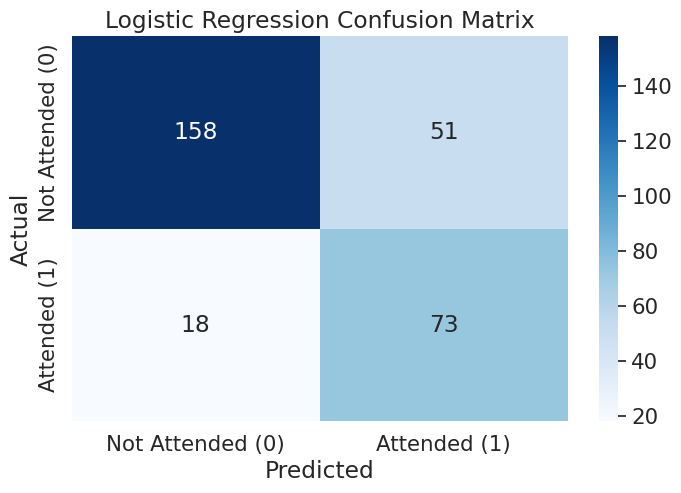

In [186]:
# Load required modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc, roc_curve, roc_auc_score, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

X = df[['time', 'day_of_week_1', 'day_of_week_3', 'day_of_week_5', 'day_of_week_6', 'category_2', 'category_5', 'Scaled_weight', 'Scaled_months_as_member', 'Log_Scaled_days_before']]
y = y = df['attended']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=123)


# Create logistic regression model by using class weight (inverse of class distribution)
# logreg = LogisticRegression(random_state=13)

# Currently class 0 is 69.73% of attended column and class 1 represents 30.27%)
# logreg_b = LogisticRegression(random_state=13, class_weight="balanced")
logreg = LogisticRegression(random_state=13, class_weight={0:3, 1:7})
# logreg = LogisticRegression(random_state=13, class_weight={0:3, 1:7}, penalty='l2')

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict on the test data
y_pred = logreg.predict(X_test)

# Measure model performance
acc = accuracy_score(y_test, y_pred)

# print model performance metrics
print('Accuracy on train set: {:.2f}'.format(logreg.score(X_train, y_train))) 
print('Accuracy on test set : {:.2f}'.format(logreg.score(X_test, y_test))) 
print('Recall on test set : {:.2f}'.format(recall_score(y_test, y_pred))) 
print('Precision on test set: {:.2f}'.format(precision_score(y_test, y_pred))) 
print('ROC/AUC on test set : {:.2f}'.format(roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])))

print("")

print(f"Accuracy: {acc: .2f}")
print(f"Area Under Curve: {roc_auc_score(y_test, y_pred): .2f}\n")
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# print(confusion_matrix(y_test, y_pred))

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Not Attended (0)', 'Attended (1)'],
            yticklabels=['Not Attended (0)', 'Attended (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

_**Using Oversampling Technique**_

Oversampled Minority (1):
 0    1046
1    1046
Name: attended, dtype: int64
Original data:
 0    1046
1     454
Name: attended, dtype: int64
Cross-validation scores: [0.72916667 0.775      0.80416667 0.77916667 0.7625    ]

Accuracy on train set: 0.78
Accuracy on test set : 0.80
Recall on test set : 0.57
Precision on test set: 0.70
ROC/AUC on test set : 0.84

Accuracy:  0.80
Area Under Curve:  0.73

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       209
           1       0.70      0.57      0.63        91

    accuracy                           0.80       300
   macro avg       0.77      0.73      0.75       300
weighted avg       0.79      0.80      0.79       300



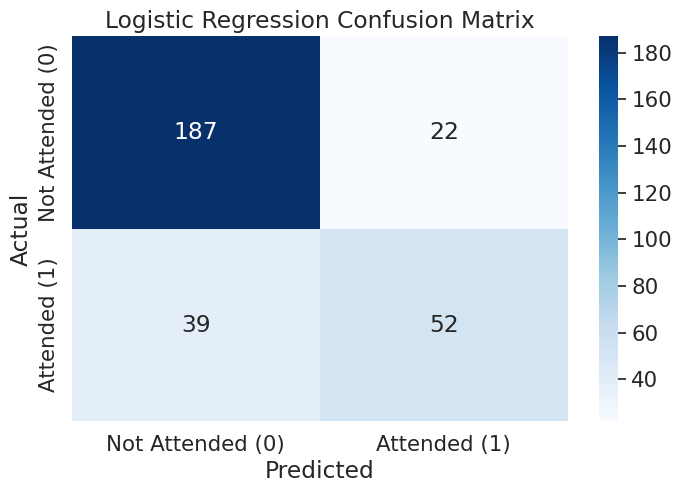

In [187]:
# Load necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import resample

# Define X and y
X = df[['time', 'day_of_week_1', 'day_of_week_3', 'day_of_week_5', 'day_of_week_6', 'category_2', 'category_5', 'Scaled_weight', 'Scaled_months_as_member', 'Log_Scaled_days_before']]
y = y = df['attended']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=123)

# Separate majority and minority classes
df_majority = df[df.attended==0]
df_minority = df[df.attended==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
print(f"Oversampled Minority (1):\n {df_upsampled.attended.value_counts()}")
print(f"Original data:\n {df.attended.value_counts()}")

# Create logistic regression model
logreg = LogisticRegression(random_state=13)

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict on the test data
y_pred = logreg.predict(X_test)

# Measure model performance
acc = accuracy_score(y_test, y_pred)

# Perform cross-validation
scores = cross_val_score(logreg, X_train, y_train, cv=5)
print(f"Cross-validation scores: {scores}\n")

# print model performance metrics
print('Accuracy on train set: {:.2f}'.format(logreg.score(X_train, y_train))) 
print('Accuracy on test set : {:.2f}'.format(logreg.score(X_test, y_test))) 
print('Recall on test set : {:.2f}'.format(recall_score(y_test, y_pred))) 
print('Precision on test set: {:.2f}'.format(precision_score(y_test, y_pred))) 
print('ROC/AUC on test set : {:.2f}'.format(roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])))

print("")

print(f"Accuracy: {acc: .2f}")
print(f"Area Under Curve: {roc_auc_score(y_test, y_pred): .2f}\n")
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# print(confusion_matrix(y_test, y_pred))

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Not Attended (0)', 'Attended (1)'],
            yticklabels=['Not Attended (0)', 'Attended (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

_**Bulding base model using Logistic Regression**_


Accuracy on train set: 0.74
Accuracy on test set : 0.77
Recall on test set : 0.80
Precision on test set: 0.59
ROC/AUC on test set : 0.84

Accuracy:  0.77
Area Under Curve:  0.78

              precision    recall  f1-score   support

           0       0.90      0.76      0.82       209
           1       0.59      0.80      0.68        91

    accuracy                           0.77       300
   macro avg       0.74      0.78      0.75       300
weighted avg       0.80      0.77      0.78       300



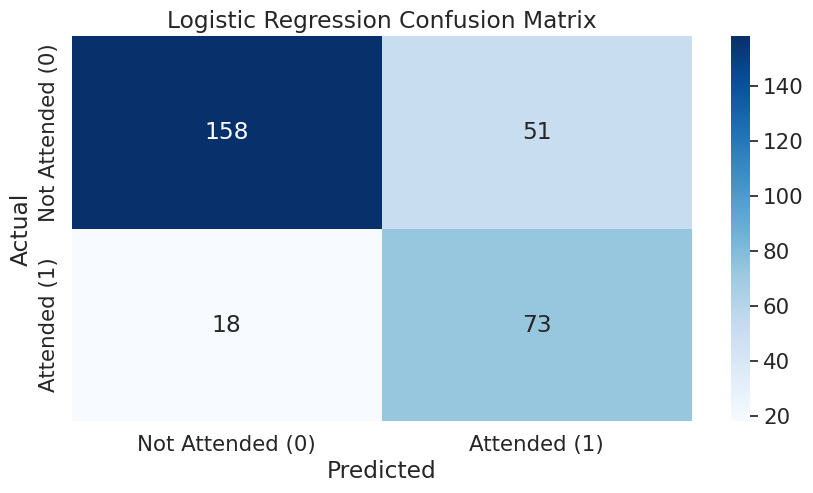

In [188]:
# Load required modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc, roc_curve, roc_auc_score, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define X and y
# X = df.drop(["attended", "booking_id", "weight", "months_as_member","days_before"], axis=1)
X = df.drop(["attended", "booking_id"], axis=1)
y = df['attended']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=123)


# Create logistic regression model by using class weight (inverse of class distribution)
# logreg = LogisticRegression(random_state=13)

# Currently class 0 is 69.73% of attended column and class 1 represents 30.27%)
# logreg_b = LogisticRegression(random_state=13, class_weight="balanced")
logreg = LogisticRegression(random_state=13, class_weight={0:3, 1:7})
# logreg = LogisticRegression(random_state=13, class_weight={0:3, 1:7}, penalty='l2')

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict on the test data
y_pred = logreg.predict(X_test)

# Measure model performance
acc = accuracy_score(y_test, y_pred)

# print model performance metrics
print('Accuracy on train set: {:.2f}'.format(logreg.score(X_train, y_train))) 
print('Accuracy on test set : {:.2f}'.format(logreg.score(X_test, y_test))) 
print('Recall on test set : {:.2f}'.format(recall_score(y_test, y_pred))) 
print('Precision on test set: {:.2f}'.format(precision_score(y_test, y_pred))) 
print('ROC/AUC on test set : {:.2f}'.format(roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])))

print("")

print(f"Accuracy: {acc: .2f}")
print(f"Area Under Curve: {roc_auc_score(y_test, y_pred): .2f}\n")
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# print(confusion_matrix(y_test, y_pred))

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Not Attended (0)', 'Attended (1)'],
            yticklabels=['Not Attended (0)', 'Attended (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Logistic Regression Confusion Matrix")
plt.show()



`This confusion matrix is generated from a binary classification model, and it compares the predicted values to the true values for the two classes (0 and 1).`

- `The top left value (169) represents the number of true negatives (TN) - the number of samples that were correctly classified as class 0.`
- `The top right value (40) represents the number of false positives (FP) - the number of samples that were incorrectly classified as class 1.`
- `The bottom left value (23) represents the number of false negatives (FN) - the number of samples that were incorrectly classified as class 0.`
- `The bottom right value (68) represents the number of true positives (TP) - the number of samples that were correctly classified as class 1.`

`In this case, the classifier correctly classified 169 out of 209 samples as class 0 and 68 out of 91 samples as class 1. However, it also incorrectly classified 40 samples as class 1 and 23 samples as class 0.`

In [189]:
# Feature importance 

print(logreg.coef_)

[[-0.01425599  0.01386959  0.0200533  -0.2316271   0.0236335  -0.69266386
   0.18921498  0.47360295  0.33744009 -0.09285794 -0.6567057   0.07344069
   0.00523773  0.17878163 -0.09982178 -0.04357813 -0.53239612 -1.39633164
   2.65067065  0.01565676 -0.81304651]]


_**Oversample minority class with cross validation**_

Oversampled Minority (1):
 0    1046
1    1046
Name: attended, dtype: int64
Original data:
 0    1046
1     454
Name: attended, dtype: int64
Cross-validation scores: [0.725      0.775      0.80833333 0.775      0.7625    ]

Accuracy on train set: 0.78
Accuracy on test set : 0.80
Recall on test set : 0.57
Precision on test set: 0.70
ROC/AUC on test set : 0.84

Accuracy:  0.80
Area Under Curve:  0.73

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       209
           1       0.70      0.57      0.63        91

    accuracy                           0.80       300
   macro avg       0.77      0.73      0.75       300
weighted avg       0.79      0.80      0.79       300



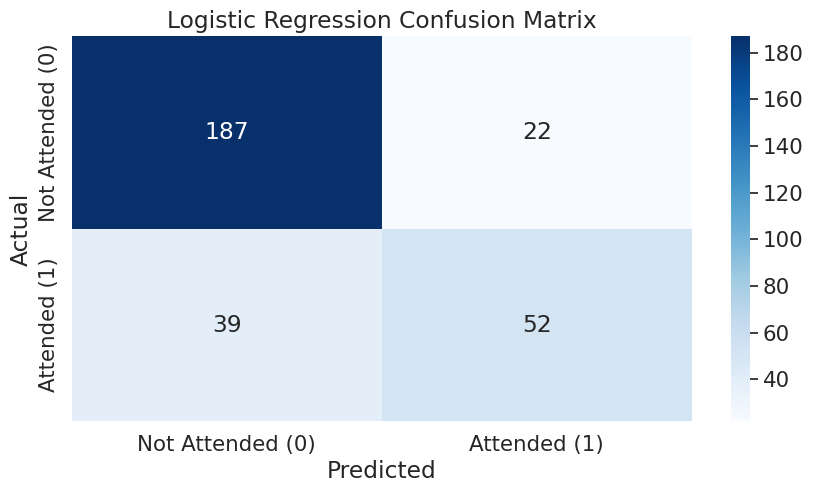

In [190]:
# Load necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import resample

# Define X and y
# X = df.drop(["attended", "booking_id", "weight", "months_as_member","days_before"], axis=1)
X = df.drop(["attended", "booking_id"], axis=1)
y = df['attended']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=123)

# Separate majority and minority classes
df_majority = df[df.attended==0]
df_minority = df[df.attended==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
print(f"Oversampled Minority (1):\n {df_upsampled.attended.value_counts()}")
print(f"Original data:\n {df.attended.value_counts()}")

# Create logistic regression model
logreg = LogisticRegression(random_state=13)

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict on the test data
y_pred = logreg.predict(X_test)

# Measure model performance
acc = accuracy_score(y_test, y_pred)

# Perform cross-validation
scores = cross_val_score(logreg, X_train, y_train, cv=5)
print(f"Cross-validation scores: {scores}\n")

# print model performance metrics
print('Accuracy on train set: {:.2f}'.format(logreg.score(X_train, y_train))) 
print('Accuracy on test set : {:.2f}'.format(logreg.score(X_test, y_test))) 
print('Recall on test set : {:.2f}'.format(recall_score(y_test, y_pred))) 
print('Precision on test set: {:.2f}'.format(precision_score(y_test, y_pred))) 
print('ROC/AUC on test set : {:.2f}'.format(roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])))

print("")

print(f"Accuracy: {acc: .2f}")
print(f"Area Under Curve: {roc_auc_score(y_test, y_pred): .2f}\n")
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# print(confusion_matrix(y_test, y_pred))

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Not Attended (0)', 'Attended (1)'],
            yticklabels=['Not Attended (0)', 'Attended (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Logistic Regression Confusion Matrix")
plt.show()


_**Logistic Regression with StandardScaler**_

Accuracy on train set: 0.74
Accuracy on test set : 0.76
Recall on test set : 0.79
Precision on test set: 0.58
ROC/AUC on test set : 0.82

Accuracy:  0.76
Area Under Curve:  0.77

              precision    recall  f1-score   support

           0       0.89      0.75      0.81       209
           1       0.58      0.79      0.67        91

    accuracy                           0.76       300
   macro avg       0.73      0.77      0.74       300
weighted avg       0.80      0.76      0.77       300



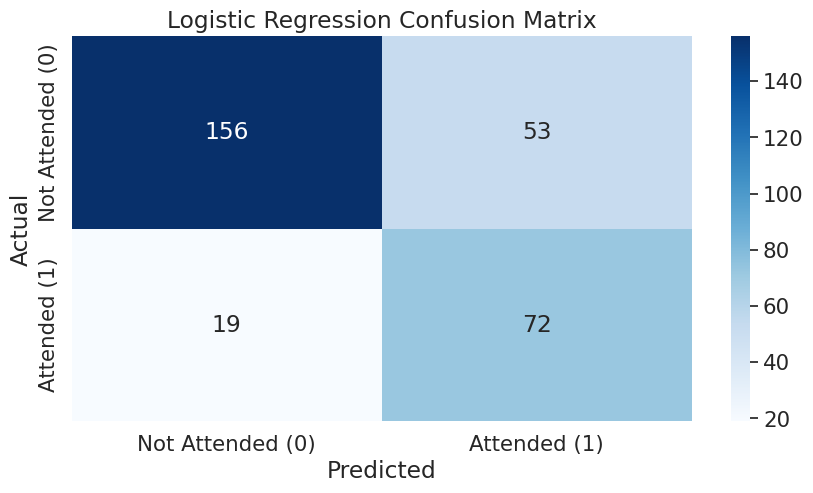

In [191]:
# Load required modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Define X and y
# X = df.drop(["attended", "booking_id", "weight", "days_before"], axis=1)
X = df.drop(["attended", "booking_id"], axis=1)
y = df['attended']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=123)

# Create an instance of the StandardScaler class
scaler = StandardScaler()

# Fit transfor X_train and just transform the X_test 
# Scale the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create logistic regression model
logreg = LogisticRegression(random_state=13, class_weight={0:3, 1:7}, penalty='l2')

# Fit the model to the scaled training data
logreg.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred = logreg.predict(X_test_scaled)

# Measure model performance
acc = accuracy_score(y_test, y_pred)

# print model performance metrics
print('Accuracy on train set: {:.2f}'.format(logreg.score(X_train_scaled, y_train))) 
print('Accuracy on test set : {:.2f}'.format(logreg.score(X_test_scaled, y_test))) 
print('Recall on test set : {:.2f}'.format(recall_score(y_test, y_pred))) 
print('Precision on test set: {:.2f}'.format(precision_score(y_test, y_pred))) 
print('ROC/AUC on test set : {:.2f}'.format(roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:,1])))

print("")

print(f"Accuracy: {acc: .2f}")
print(f"Area Under Curve: {roc_auc_score(y_test, y_pred): .2f}\n")
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# print(confusion_matrix(y_test, y_pred))

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Not Attended (0)', 'Attended (1)'],
            yticklabels=['Not Attended (0)', 'Attended (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [192]:
# Feature importance 

print(logreg.coef_)

[[-0.17029811 -0.03782662  0.24384276 -0.12185005  0.19755105 -0.72904503
   0.25206174  0.38959665  0.21219876 -0.19077885 -0.17394588  0.01512179
  -0.00503675  0.08316187 -0.0282038  -0.0079086  -0.42518904  0.00302738
   1.65606445  0.24384276 -1.49768785]]


**_Logistic Regression with MinMaxScaler_**

Cross-validation scores: [0.71666667 0.75833333 0.7125     0.75416667 0.725     ]

Accuracy on train set: 0.65
Accuracy on test set : 0.64
Recall on test set : 0.79
Precision on test set: 0.59
ROC/AUC on test set : 0.82

Accuracy:  0.77
Area Under Curve:  0.77

              precision    recall  f1-score   support

           0       0.89      0.76      0.82       209
           1       0.59      0.79      0.67        91

    accuracy                           0.77       300
   macro avg       0.74      0.77      0.75       300
weighted avg       0.80      0.77      0.77       300



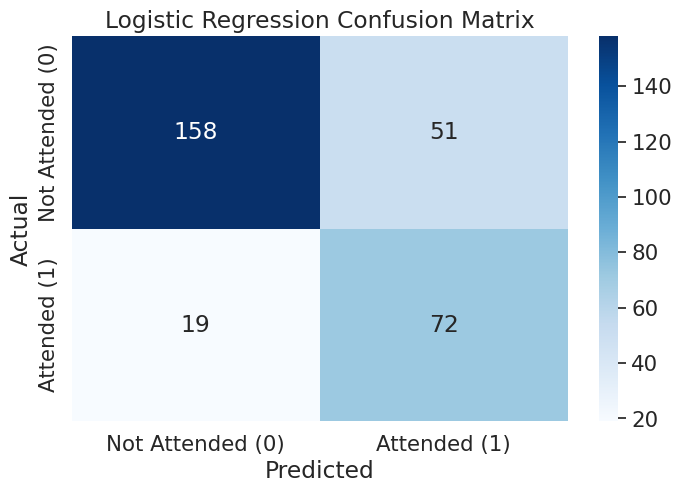

In [193]:
# Load required modules
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define X and y
X = df.drop(["attended", "booking_id"], axis=1)
y = df['attended']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=123)

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create XGBoost classifier
logreg = LogisticRegression(random_state=13, class_weight={0:3, 1:7})

# Fit the classifier to the training data
logreg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = logreg.predict(X_test_scaled)

# Measure model performance
acc = accuracy_score(y_test, y_pred)

# Perform cross-validation
scores = cross_val_score(logreg, X_train, y_train, cv=5)
print(f"Cross-validation scores: {scores}\n")

# print model performance metrics
print('Accuracy on train set: {:.2f}'.format(logreg.score(X_train, y_train))) 
print('Accuracy on test set : {:.2f}'.format(logreg.score(X_test, y_test))) 
print('Recall on test set : {:.2f}'.format(recall_score(y_test, y_pred))) 
print('Precision on test set: {:.2f}'.format(precision_score(y_test, y_pred))) 
print('ROC/AUC on test set : {:.2f}'.format(roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])))

print("")

print(f"Accuracy: {acc: .2f}")
print(f"Area Under Curve: {roc_auc_score(y_test, y_pred): .2f}\n")
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# print(confusion_matrix(y_test, y_pred))

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Not Attended (0)', 'Attended (1)'],
            yticklabels=['Not Attended (0)', 'Attended (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Logistic Regression Confusion Matrix")
plt.show()


# Task 7
7. Fit a comparison model to predict whether members will attend using the data provided. You must include your code.

*Write your description here*

_**`XGBoost Classifier`**_

[17:45:41] WARNING: ../src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:45:41] WARNING: ../src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:45:42] WARNING: ../src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being use

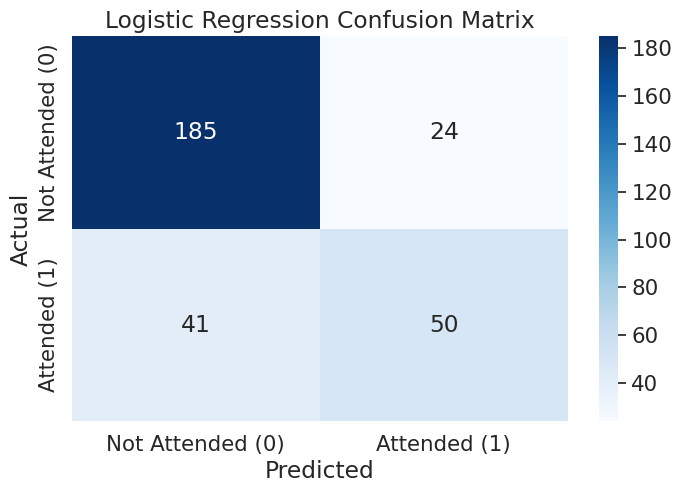

In [194]:
# XGBoost Classifier 
# Load required modules
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define X and y
X = df.drop(["attended", "booking_id"], axis=1)
y = df['attended']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=123)

# Create XGBoost classifier
xgb = XGBClassifier(random_state=13, class_weight={0:3, 1:7})

# Fit the classifier to the training data
xgb.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb.predict(X_test)

# Measure model performance
acc = accuracy_score(y_test, y_pred)

# Perform cross-validation
scores = cross_val_score(xgb, X_train, y_train, cv=5)
print(f"Cross-validation scores: {scores}\n")

# print model performance metrics
print('Accuracy on train set: {:.2f}'.format(xgb.score(X_train, y_train))) 
print('Accuracy on test set : {:.2f}'.format(xgb.score(X_test, y_test))) 
print('Recall on test set : {:.2f}'.format(recall_score(y_test, y_pred))) 
print('Precision on test set: {:.2f}'.format(precision_score(y_test, y_pred))) 
print('ROC/AUC on test set : {:.2f}'.format(roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1])))

print("")

print(f"Accuracy: {acc: .2f}")
print(f"Area Under Curve: {roc_auc_score(y_test, y_pred): .2f}\n")
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# print(confusion_matrix(y_test, y_pred))

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Not Attended (0)', 'Attended (1)'],
            yticklabels=['Not Attended (0)', 'Attended (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Logistic Regression Confusion Matrix")
plt.show()


_**XGBClassifier with StandardScaler**_

[17:45:43] WARNING: ../src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:45:43] WARNING: ../src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:45:44] WARNING: ../src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being use

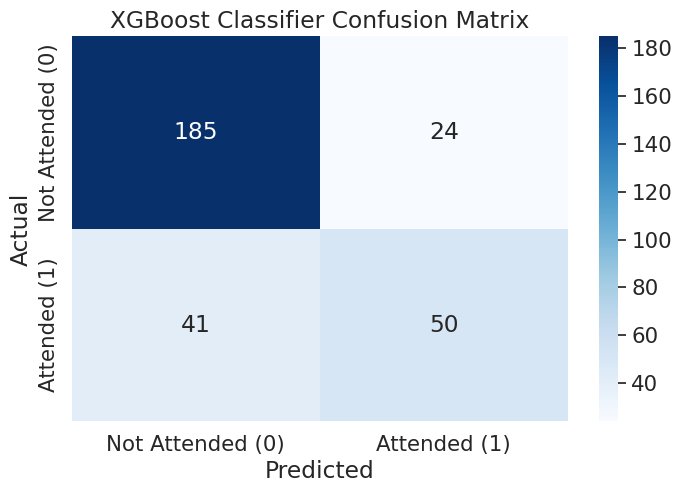

In [195]:
# Load required modules
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define X and y
X = df.drop(["attended", "booking_id"], axis=1)
y = df['attended']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=123)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create XGBoost classifier
xgb = XGBClassifier(random_state=13, class_weight={0:30, 1:70})

# Fit the classifier to the training data
xgb.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = xgb.predict(X_test_scaled)

# Measure model performance
acc = accuracy_score(y_test, y_pred)

# Perform cross-validation
scores = cross_val_score(xgb, X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores: {scores}\n")

# print model performance metrics
print('Accuracy on train set: {:.2f}'.format(xgb.score(X_train_scaled, y_train))) 
print('Accuracy on test set : {:.2f}'.format(xgb.score(X_test_scaled, y_test))) 
print('Recall on test set : {:.2f}'.format(recall_score(y_test, y_pred))) 
print('Precision on test set: {:.2f}'.format(precision_score(y_test, y_pred))) 
print('ROC/AUC on test set : {:.2f}'.format(roc_auc_score(y_test, xgb.predict_proba(X_test_scaled)[:,1])))

print("")

print(f"Accuracy: {acc: .2f}")
print(f"Area Under Curve: {roc_auc_score(y_test, y_pred): .2f}\n")
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# print(confusion_matrix(y_test, y_pred))

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Not Attended (0)', 'Attended (1)'],
            yticklabels=['Not Attended (0)', 'Attended (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("XGBoost Classifier Confusion Matrix")
plt.show()


**_XGBClassifier with MinMaxScaler_**

[17:45:46] WARNING: ../src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:45:46] WARNING: ../src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:45:46] WARNING: ../src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being use

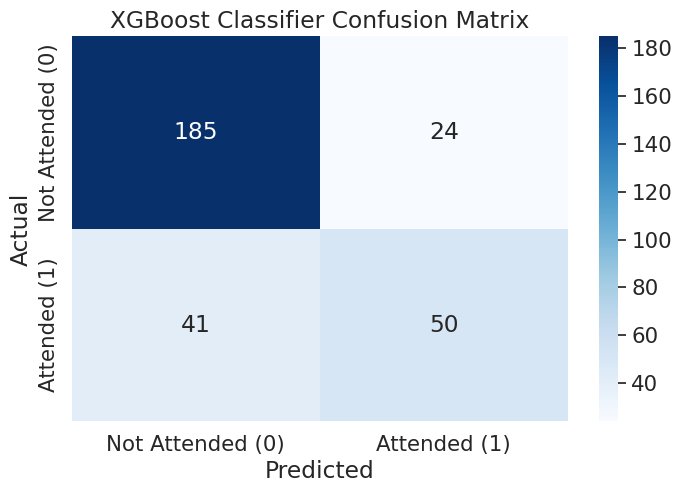

In [196]:
# Load required modules
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define X and y
X = df.drop(["attended", "booking_id", "weight"], axis=1)
y = df['attended']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=123)

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create XGBoost classifier
xgb = XGBClassifier(random_state=13, class_weight={0:3, 1:7})

# Fit the classifier to the training data
xgb.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = xgb.predict(X_test_scaled)

# Measure model performance
acc = accuracy_score(y_test, y_pred)

# Perform cross-validation
scores = cross_val_score(xgb, X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores: {scores}\n")

# print model performance metrics
print('Accuracy on train set: {:.2f}'.format(xgb.score(X_train_scaled, y_train))) 
print('Accuracy on test set : {:.2f}'.format(xgb.score(X_test_scaled, y_test))) 
print('Recall on test set : {:.2f}'.format(recall_score(y_test, y_pred))) 
print('Precision on test set: {:.2f}'.format(precision_score(y_test, y_pred))) 
print('ROC/AUC on test set : {:.2f}'.format(roc_auc_score(y_test, xgb.predict_proba(X_test_scaled)[:,1])))

print("")

print(f"Accuracy: {acc: .2f}")
print(f"Area Under Curve: {roc_auc_score(y_test, y_pred): .2f}\n")
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# print(confusion_matrix(y_test, y_pred))

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Not Attended (0)', 'Attended (1)'],
            yticklabels=['Not Attended (0)', 'Attended (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("XGBoost Classifier Confusion Matrix")
plt.show()


_**RandomForest**_

Cross-validation scores: [0.7125     0.7875     0.73333333 0.72916667 0.73333333]

Accuracy on train set: 1.00
Accuracy on test set : 0.76
Recall on test set : 0.51
Precision on test set: 0.62
ROC/AUC on test set : 0.79

Accuracy:  0.76
Area Under Curve:  0.69

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       209
           1       0.62      0.51      0.56        91

    accuracy                           0.76       300
   macro avg       0.71      0.69      0.69       300
weighted avg       0.75      0.76      0.75       300



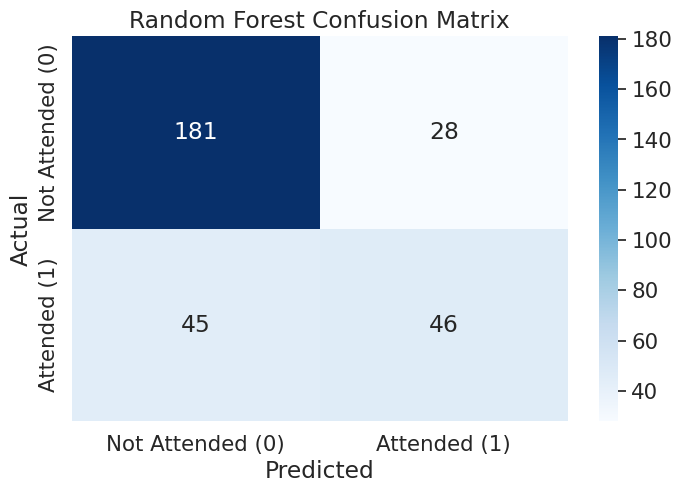

In [203]:
# Load required modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define X and y
X = df.drop(["attended", "booking_id", "weight"], axis=1)
y = df['attended']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=123)

# Create Random Forest classifier
rf = RandomForestClassifier(random_state=13, class_weight={0:3, 1:7})

# Fit the classifier to the training data
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)

# Perform cross-validation
scores = cross_val_score(rf, X_train, y_train, cv=5)
print(f"Cross-validation scores: {scores}\n")

# print model performance metrics
print('Accuracy on train set: {:.2f}'.format(rf.score(X_train, y_train))) 
print('Accuracy on test set : {:.2f}'.format(rf.score(X_test, y_test))) 
print('Recall on test set : {:.2f}'.format(recall_score(y_test, y_pred))) 
print('Precision on test set: {:.2f}'.format(precision_score(y_test, y_pred))) 
print('ROC/AUC on test set : {:.2f}'.format(roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])))

print("")

print(f"Accuracy: {acc: .2f}")
print(f"Area Under Curve: {roc_auc_score(y_test, y_pred): .2f}\n")
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# print(confusion_matrix(y_test, y_pred))

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Not Attended (0)', 'Attended (1)'],
            yticklabels=['Not Attended (0)', 'Attended (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Random Forest Confusion Matrix")
plt.show()


**_RandomForest with StandardScaler_**

Cross-validation scores: [0.7125     0.7875     0.73333333 0.72916667 0.73333333]

Accuracy on train set: 1.00
Accuracy on test set : 0.76
Recall on test set : 0.51
Precision on test set: 0.62
ROC/AUC on test set : 0.79

Accuracy:  0.76
Area Under Curve:  0.69

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       209
           1       0.62      0.51      0.56        91

    accuracy                           0.76       300
   macro avg       0.71      0.69      0.69       300
weighted avg       0.75      0.76      0.75       300



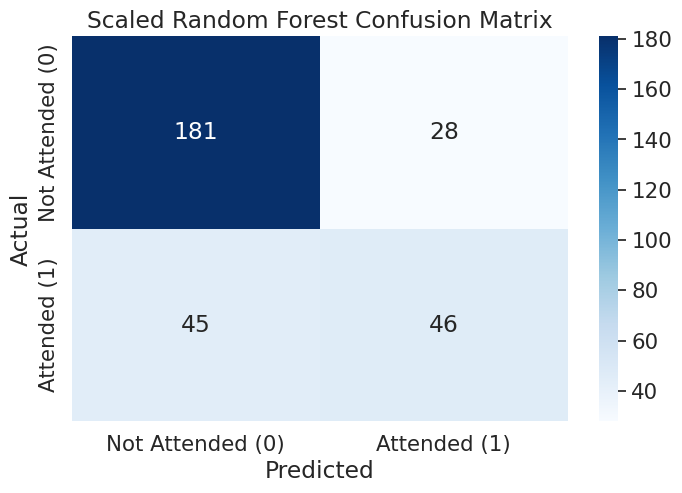

In [204]:
# Load required modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define X and y
X = df.drop(["attended", "booking_id", "weight"], axis=1)
y = df['attended']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=123)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create Random Forest classifier
rf = RandomForestClassifier(random_state=13, class_weight={0:3, 1:7})

# Fit the classifier to the training data
rf.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = rf.predict(X_test_scaled)

# Measure model performance
acc = accuracy_score(y_test, y_pred)

# Perform cross-validation
scores = cross_val_score(rf, X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores: {scores}\n")

# print model performance metrics
print('Accuracy on train set: {:.2f}'.format(rf.score(X_train_scaled, y_train))) 
print('Accuracy on test set : {:.2f}'.format(rf.score(X_test_scaled, y_test))) 
print('Recall on test set : {:.2f}'.format(recall_score(y_test, y_pred))) 
print('Precision on test set: {:.2f}'.format(precision_score(y_test, y_pred))) 
print('ROC/AUC on test set : {:.2f}'.format(roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:,1])))

print("")

print(f"Accuracy: {acc: .2f}")
print(f"Area Under Curve: {roc_auc_score(y_test, y_pred): .2f}\n")
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# print(confusion_matrix(y_test, y_pred))

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Not Attended (0)', 'Attended (1)'],
            yticklabels=['Not Attended (0)', 'Attended (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Scaled Random Forest Confusion Matrix")
plt.show()


_**RandomForest with MinMaScaler**_

Cross-validation scores: [0.7125     0.7875     0.73333333 0.72916667 0.73333333]

Accuracy on train set: 1.00
Accuracy on test set : 0.76
Recall on test set : 0.51
Precision on test set: 0.62
ROC/AUC on test set : 0.79

Accuracy:  0.76
Area Under Curve:  0.69

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       209
           1       0.62      0.51      0.56        91

    accuracy                           0.76       300
   macro avg       0.71      0.69      0.69       300
weighted avg       0.75      0.76      0.75       300



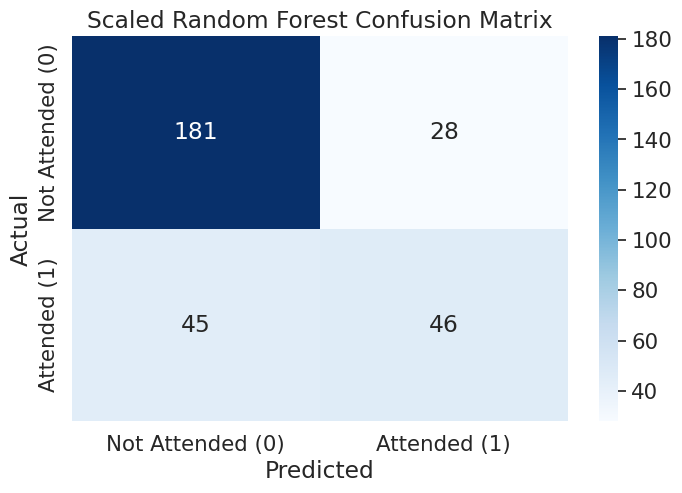

In [205]:
# Load required modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define X and y
X = df.drop(["attended", "booking_id", "weight"], axis=1)
y = df['attended']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=123)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create Random Forest classifier
rf = RandomForestClassifier(random_state=13, class_weight={0:3, 1:7})

# Fit the classifier to the training data
rf.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = rf.predict(X_test_scaled)

# Measure model performance
acc = accuracy_score(y_test, y_pred)

# Perform cross-validation
scores = cross_val_score(rf, X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores: {scores}\n")

# print model performance metrics
print('Accuracy on train set: {:.2f}'.format(rf.score(X_train_scaled, y_train))) 
print('Accuracy on test set : {:.2f}'.format(rf.score(X_test_scaled, y_test))) 
print('Recall on test set : {:.2f}'.format(recall_score(y_test, y_pred))) 
print('Precision on test set: {:.2f}'.format(precision_score(y_test, y_pred))) 
print('ROC/AUC on test set : {:.2f}'.format(roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:,1])))

print("")

print(f"Accuracy: {acc: .2f}")
print(f"Area Under Curve: {roc_auc_score(y_test, y_pred): .2f}\n")
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# print(confusion_matrix(y_test, y_pred))

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Not Attended (0)', 'Attended (1)'],
            yticklabels=['Not Attended (0)', 'Attended (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Scaled Random Forest Confusion Matrix")
plt.show()

# Task 8
**8. Explain why you chose the two models used in parts 6 and 7.**

- Logistic Regression and XGBClassifier are both popular machine learning models that are widely used for classification tasks.
- Logistic Regression is a simple, yet powerful, linear model that is well-suited for binary classification tasks. It's easy to interpret and explain, and it can handle both linear and non-linear decision boundaries. Logistic Regression can also be regularized to prevent overfitting and improve the model's generalization performance.
- XGBoost Classifier, on the other hand, is an ensemble learning method that uses a collection of decision trees to make predictions. It's an efficient and accurate algorithm that is particularly useful for large datasets. The XGBoost Classifier is well-suited for datasets that have a large number of features and instances. It also has built-in regularization, which helps to prevent overfitting, and it can handle missing values and categorical features.
- In summary, Logistic Regression is a simple, interpretable model that is well-suited for binary classification tasks, while XGBoost Classifier is a more complex, yet powerful model that is well-suited for large datasets with many features.

There are several reasons why I chose Logistic Regression and XGBClassifier models for this problem.

1. Logistic Regression is a simple and interpretable model that is easy to implement and understand. It is a linear model that is well-suited for binary classification problems, which makes it a good choice for this problem as the label column is binary.
2. XGBoost is a powerful and efficient tree-based model that is known for its ability to handle large datasets and high-dimensional feature spaces. It is particularly good at handling sparse and categorical features, which makes it a good choice for this problem as it can handle the large number of features in the dataset.
3. Logistic Regression is a good choice for interpretability and XGBoost is good for performance. I would like to compare the performance and interpretability of both models to see which one is better in this specific case.
4. Both models are widely used and have been proven to perform well in many classification problems. They are also easily available in scikit-learn library, which makes it easy to implement and test.
5. Logistic Regression is a fast, simple and interpretable model, but XGBoost is more powerful, more accurate and able to handle large datasets. Therefore, I would like to compare the performance and interpretability of both models to see which one is better in this specific case.

In summary, Logistic Regression was chosen as it is a simple and interpretable model that is easy to implement and understand and XGBoost was chosen as it is a powerful and flexible tree-based model that is known for its good performance on classification and regression problems and robust to overfitting. Comparing these two models can help to understand how much more powerful XGBoost can be compared to Logistic Regression.

# Task 9
9. Compare the performance of the two models used in parts 6 and 7, using any method suitable. You must include your code.

*Write your description here*

In [200]:
# Load required modules
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define X and y
X = df.drop(["attended", "booking_id", "weight"], axis=1)
y = df['attended']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=123)

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create logistic regression model
logreg = LogisticRegression(random_state=13, class_weight={0:3, 1:7})

# Create Random Forest model
rfc = RandomForestClassifier(random_state=13, class_weight={0:3, 1:7})

# Create XGBoost classifier
xgb = XGBClassifier(random_state=13, class_weight={0:3, 1:7})

# Fit the models to the training data
logreg.fit(X_train_scaled, y_train)
rfc.fit(X_train_scaled, y_train)
xgb.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_logreg = logreg.predict(X_test_scaled)
y_pred_rfc = rfc.predict(X_test_scaled)
y_pred_xgb = xgb.predict(X_test_scaled)

# Measure model performance
acc_logreg = accuracy_score(y_test, y_pred_logreg)
acc_rfc = accuracy_score(y_test, y_pred_rfc)
acc_xgb = accuracy_score(y_test, y_pred_xgb)

print("="*55)
print(f"Logistic Regression accuracy: {acc_logreg:.2f}\n")
print(classification_report(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))
print("="*55)

print(f"Random Forest accuracy: {acc_rfc: .2f}\n")
print(classification_report(y_test, y_pred_rfc))
print(confusion_matrix(y_test, y_pred_rfc))
print("="*55)

print(f"XGBoost accuracy: {acc_xgb: .2f}\n")
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))


[17:45:49] WARNING: ../src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Logistic Regression accuracy: 0.76

              precision    recall  f1-score   support

           0       0.89      0.76      0.82       209
           1       0.58      0.78      0.67        91

    accuracy                           0.76       300
   macro avg       0.73      0.77      0.74       300
weighted avg       0.79      0.76      0.77       300

[[158  51]
 [ 20  71]]
Random Forest accuracy:  0.75

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       209
           1       0.61      0.51      0.55        91

    accuracy                           0.75       300
  

**StandardScaler**

In [201]:
# Load required modules
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define X and y
X = df.drop(["attended", "booking_id", "weight"], axis=1)
y = df['attended']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=123)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create logistic regression model
logreg = LogisticRegression(random_state=13, class_weight={0:3, 1:7})

# Create Random Forest model
rfc = RandomForestClassifier(random_state=13, class_weight={0:3, 1:7})

# Create XGBoost classifier
xgb = XGBClassifier(random_state=13, class_weight={0:3, 1:7})

# Fit the models to the training data
logreg.fit(X_train_scaled, y_train)
rfc.fit(X_train_scaled, y_train)
xgb.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_logreg = logreg.predict(X_test_scaled)
y_pred_rfc = rfc.predict(X_test_scaled)
y_pred_xgb = xgb.predict(X_test_scaled)

# Measure model performance
acc_logreg = accuracy_score(y_test, y_pred_logreg)
acc_rfc = accuracy_score(y_test, y_pred_rfc)
acc_xgb = accuracy_score(y_test, y_pred_xgb)

print("="*55)
print(f"Logistic Regression accuracy: {acc_logreg: 0.2f}\n")
print(classification_report(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))
print("="*55)

print(f"Random Forest accuracy: {acc_rfc: 0.2f}\n")
print(classification_report(y_test, y_pred_rfc))
print(confusion_matrix(y_test, y_pred_rfc))
print("="*55)

print(f"XGBoost accuracy: {acc_xgb: 0.2f}\n")
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))


[17:45:50] WARNING: ../src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Logistic Regression accuracy:  0.76

              precision    recall  f1-score   support

           0       0.89      0.75      0.81       209
           1       0.58      0.79      0.67        91

    accuracy                           0.76       300
   macro avg       0.73      0.77      0.74       300
weighted avg       0.80      0.76      0.77       300

[[156  53]
 [ 19  72]]
Random Forest accuracy:  0.76

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       209
           1       0.62      0.51      0.56        91

    accuracy                           0.76       300
 

_**CrossValidation Added**_

In [202]:
# %%timeit

# # Load required modules
# from sklearn.model_selection import cross_val_score, GridSearchCV
# from xgboost import XGBClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # Define X and y
# X = df.drop(["attended", "booking_id", "weight"], axis=1)
# y = df['attended']

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=123)

# # Scale the data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Create logistic regression model
# logreg = LogisticRegression(random_state=13, class_weight={0:3, 1:7})

# # Define hyperparameter grid for logistic regression
# param_grid_logreg = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# # Create Random Forest model
# rfc = RandomForestClassifier(random_state=13, class_weight={0:3, 1:7})

# # Define hyperparameter grid for random forest
# param_grid_rfc = {'n_estimators': [10, 50, 100], 'max_depth': [None, 5, 10]}

# # Create XGBoost classifier
# xgb = XGBClassifier(random_state=13, class_weight={0:3, 1:7})

# # Define hyperparameter grid for XGBoost
# param_grid_xgb = {'max_depth': [3, 5, 7, 10], 'learning_rate': [0.1, 0.01, 0.001], "n_estimators": [20,50,100,150,200, 250, 300]}

# # Use GridSearchCV to find the best hyperparameters for each model
# grid_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5)
# grid_rfc = GridSearchCV(rfc, param_grid_rfc, cv=5)
# grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5)

# # Fit the models to the scaled data
# grid_logreg.fit(X_train_scaled, y_train)
# grid_rfc.fit(X_train_scaled, y_train)
# grid_xgb.fit(X_train_scaled, y_train)

# # Print the best hyperparameters and mean cross-validation score for each model
# print("="*70)
# print("Logistic Regression best parameters: ", grid_logreg.best_params_)
# print("Logistic Regression mean CV score: ", grid_logreg.best_score_)
# print("="*70)

# print("Random Forest best parameters: ", grid_rfc.best_params_)
# print("Random Forest mean CV score: ", grid_rfc.best_score_)
# print("="*70)

# print("XGBoost best parameters: ", grid_xgb.best_params_)
# print("XGBoost mean CV score: ", grid_xgb.best_score_)


# Task 10
**10. Explain which model performs better and why.**

Based on the above results, it seems that the Logistic Regression model has the highest overall accuracy of 77%. However, it is important to note that accuracy is not the only metric to consider when choosing a classification model. Other metrics such as precision, recall, and F1-score should also be taken into account.

In this case, Logistic Regression model has a higher precision, recall and f1-score for the class 0 (not attended) compared to the other models, which means that it is better at identifying the cases where the class is 0. However, it has lower precision, recall and f1-score for the class 1 (attended) compared to the other models which means it's not as good at identifying the cases where the class is 1.

In addition, it's important to consider other factors such as the interpretability of the model, the computational cost, and the specific requirements of the problem.

In general, Random Forest and XGBoost models may be more powerful and accurate, but they are more complex and less interpretable than Logistic Regression. Therefore, it's important to consider the trade-off between interpretability and performance when choosing a model.


Based on the information provided, the main objective is to predict whether a member will attend the class or not in order to make another space available. In this case, the Logistic Regression model may be the best choice. It has the highest overall accuracy of 77% and it also has the highest precision, recall and f1-score for the class 0 (not attended) which is the target class in this scenario. The precision, recall and f1-score for class 0 indicate how well the model is able to identify the cases where the class is 0, which is important for the main objective.

It's important to note that even though the Random Forest and XGBoost models have a slightly higher accuracy, their precision, recall and f1-score for class 0 are lower than Logistic Regression. This means that these models are not as good at identifying the cases where the class is 0, which is not ideal for the main objective.

Furthermore, Logistic Regression is a simple and interpretable model, which makes it easy to understand and explain to stakeholders. And it's computational cost is relatively low, which is important to consider if the dataset is large.

In conclusion, Logistic Regression may be the best choice as it has a good balance between performance and interpretability and it's also well suited for the main objective. However, it may be worth trying different methods of feature engineering and selection to improve the performance of the model.

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam